<a href="https://colab.research.google.com/github/Carsoboss/pytorch_fundamentals/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PyTorch Workflow

Let's explore an example PyTorch end-to-end workflow.

Resources:
* Ground truth notebook - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb
* Book version of notebook - https://www.learnpytorch.io/01_pytorch_workflow/
* Ask a qeustion - https://github.com/mrdbourke/pytorch-deep-learning/discussions

In [1]:
what_were_covrering = {1: "data {prepare and load}",
                       2: " build model",
                       3: "fitting the model to data (training)",
                       4: "making predictions and evaluating a model (inference)",
                       5: "saving and loading a model",
                       6: "putting it all together"}

what_were_covrering

{1: 'data {prepare and load}',
 2: ' build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn #nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.1.0+cu121'

## 1.  Data(preparing and loading)

Data can be almost anything... in machine learning.

* Excel spreadsheet
* Images of any kind
* Videos (YouTube has lots of data...)
* DNA
* Text

Machine learning is a game of two parts:
1.  Get data into a numerical representation.
2.  Build a model to learn patterns in that numerical representation.  

To showcase this, let's create some *known* data using the lilnear regression formula.

We'll use a linear regression formula to make a straight line with *known* **parameters**.





In [3]:
# Create *know* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y= weight * X +bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of the msot important concepts in machine learning in general)

Let's create a training and test set with our data.

In [5]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explore's motto comes in!

"Visualize, visualize visualize!"

In [6]:
import matplotlib.pyplot as plt

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

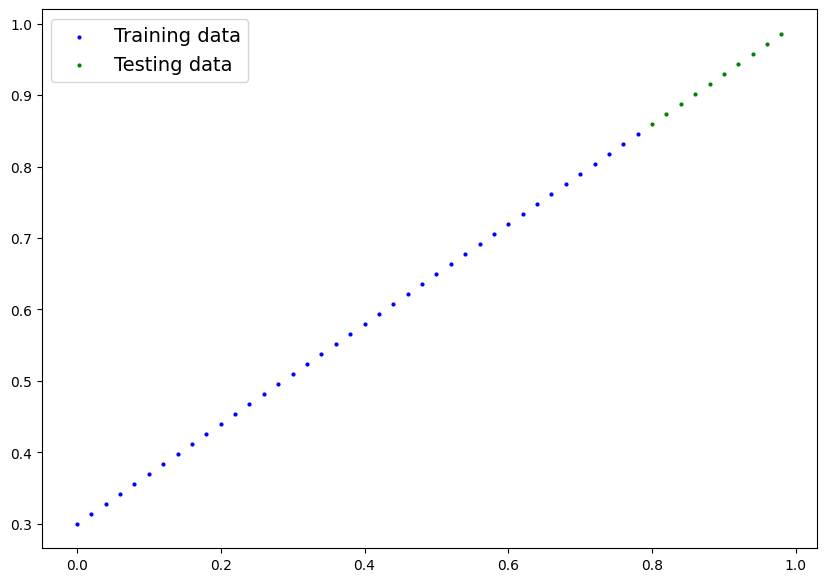

In [7]:
plot_predictions();

## 2.  Build model

Our first PyTorch model!

This is very exciting... let's do it

What our model does:
* Start with random values (weight & bias)
*Look at training data and adjust the random values (or get closer to) the idea values (the weight & bias values we used to create the data)

How does it do so?

Through two main algorithns:
1. Gradient descent
2. Backpropagation



In [8]:
from torch import nn
# Create linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float32))

    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float32))

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return self.weights * x + self.bias # this is the linear regression formula



### PyTorch model building essentials

* torch.nn - contains all of the building blocks for computation graphs (a neural network can be considered a computational graph)
* torch.nn.Parameter -what parameters shoudl our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this is hwere the optimizers in PyTorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

### Checking the contents of our PyTorch model

Now we've created a mode, let's see what's inside ...

So we can check our model parameters or what's inside our model using '.parameters()'

In [9]:
torch.randn(1)

tensor([1.7545])

In [10]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()
# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [12]:
weight, bias

(0.7, 0.3)

### Making prediciton using 'torch.inference_mode()

To check our model's predictive power, let's see how well it predicts 'y_test' based on 'X_test'.

When we pass data through our mode, it's going to run it through the forward() method

In [13]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [14]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

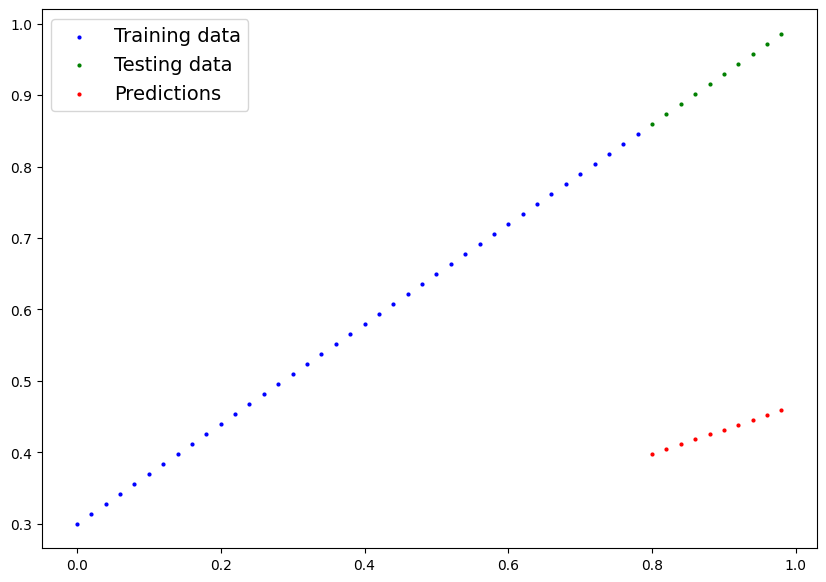

In [15]:
plot_predictions(predictions=y_preds)

## 3. Train model

The whole idea of traing is for a model to move from some *unknown* parameters (these may ne random) to some *known* parameters

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your model's predictions are is to use a loss funciton.

* Note: loss function may also be called cost function or criterion in differenc areas.  For our case, we're going to refer to it as a loss function.

Things we need to train:

* **Loss funciton:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.  

* **Optimizer:** takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias to improve the loss funciton.)

And specifically for PyTorch, we need:
 * a training loop
 * a test loop

In [16]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [17]:
# Check out our model's parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [18]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.001) #lr = learning rate = possibly the most important hyperparameter you can set

### Which loss function should I choose

Well it depends.  With experience you will start to understand which ones will match the problem you are trying to tackle.  

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
0.  Loop through the data
1.  Forward pass (this involves data moving through our model's 'forward()' funcitons) to make predicitons on data - also called forward propagation
2.  Calculate the loss (compate forward pass predictions to ground truth labels)
3.  Optimizer zero grad
4.  Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5.  Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss. (**gradient descent**)

In [19]:
# An epoch is one loop through the data... (this is a hyperparameter because we've set it ourselves)
epochs = 1000

epoch_count = []
loss_values = []
test_loss_values = []

### Training

# 0.  Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train model in PyTorch sets all parameters that require gradients to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train) #input then output
  print(f"Loss: {loss}")
  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accululate through the loop so ... we have to zero them above in step 3 for the next iteration of the loop

  ### Testing
  model_0.eval() # turns off different setting in the model not needed for evaluation/testing (dropout/batch norm layers)
  with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scenes
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happenin'
  if epoch % 100 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

    # Print out model state_dict()
    print(model_0.state_dict())


Loss: 0.31288138031959534
Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.4931890368461609
OrderedDict([('weights', tensor([0.3371])), ('bias', tensor([0.1298]))])
Loss: 0.3117292523384094
Loss: 0.3105771541595459
Loss: 0.3094250559806824
Loss: 0.30827295780181885
Loss: 0.3071208596229553
Loss: 0.3059687614440918
Loss: 0.3048166334629059
Loss: 0.30366456508636475
Loss: 0.3025124669075012
Loss: 0.3013603389263153
Loss: 0.30020827054977417
Loss: 0.29905614256858826
Loss: 0.2979040741920471
Loss: 0.2967519462108612
Loss: 0.29559987783432007
Loss: 0.29444774985313416
Loss: 0.293295681476593
Loss: 0.2921435832977295
Loss: 0.2909914553165436
Loss: 0.28983938694000244
Loss: 0.28868725895881653
Loss: 0.287535160779953
Loss: 0.2863830626010895
Loss: 0.28523099422454834
Loss: 0.2840788662433624
Loss: 0.2829267382621765
Loss: 0.281774640083313
Loss: 0.28062254190444946
Loss: 0.2794705033302307
Loss: 0.2783183455467224
Loss: 0.2771662771701813
Loss: 0.27601414918899536
Loss: 0.2748620808124542

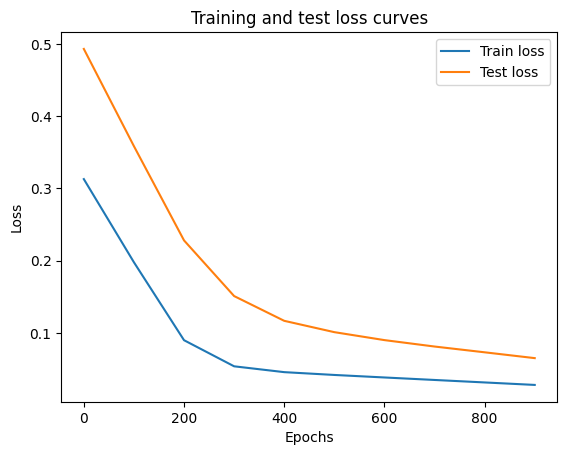

In [20]:
import numpy as np
import matplotlib.pyplot as plt
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).cpu().numpy()), label="Train loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).cpu().numpy()), label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [21]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

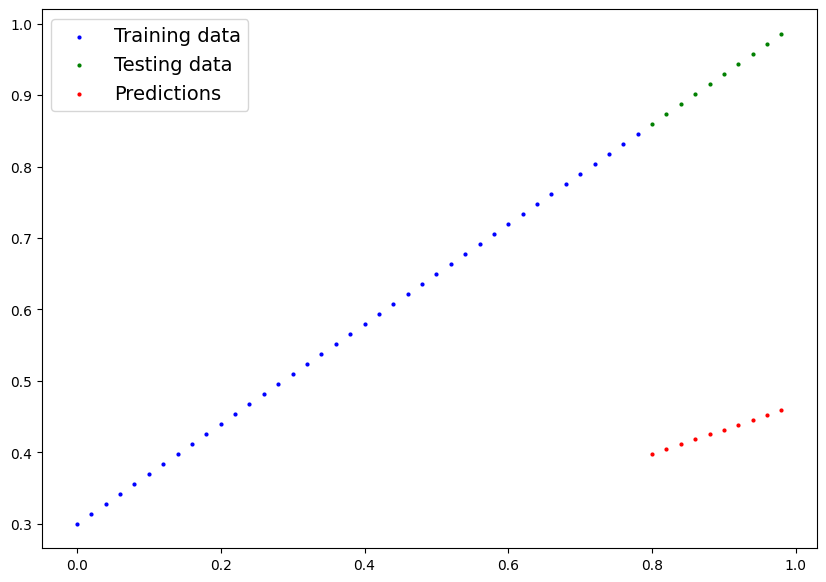

In [22]:
plot_predictions(predictions=y_preds);

In [23]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5788])), ('bias', tensor([0.3509]))])

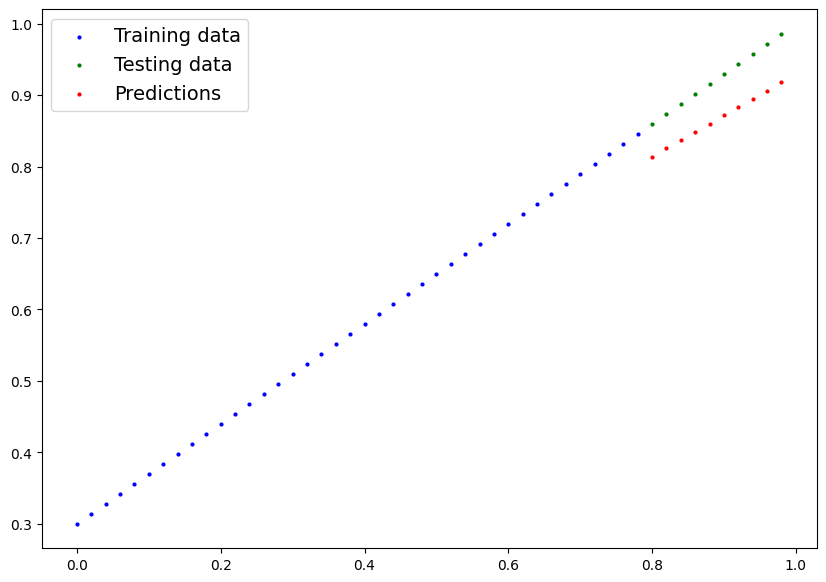

In [24]:
plot_predictions(predictions=y_preds_new);

## Saving a model in PyTorch

There are three main methods you should know about for saving and loading models in PyTorch.

1.  'torch.save()' - allows you to save a PyTorch object in Python's pickle format
2.  'torch.load()' - allows you to load a saved PyTorch object
3.  'torch.nn.Module.load_state_dict()' - allows to load a model's saved state dictionary

In [25]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_o.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

#3.  Save the model stat dict
print(f" Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

 Saving model to: models/01_pytorch_workflow_model_o.pth


In [26]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 Feb 27 00:07 01_pytorch_workflow_model_o.pth


## Loading a PyTorch model

Since we saved our model's 'state_dict()' rather tan the entire model, we'll create a new instance of our model class and load the saved 'state_dict()' into that

In [27]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5788])), ('bias', tensor([0.3509]))])

In [28]:
# To load in a saved stat_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved stat_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [29]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.5788])), ('bias', tensor([0.3509]))])

In [30]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8140],
        [0.8255],
        [0.8371],
        [0.8487],
        [0.8603],
        [0.8718],
        [0.8834],
        [0.8950],
        [0.9066],
        [0.9181]])

In [31]:
# Make some model preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8140],
        [0.8255],
        [0.8371],
        [0.8487],
        [0.8603],
        [0.8718],
        [0.8834],
        [0.8950],
        [0.9066],
        [0.9181]])

In [32]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6.  Putting it all together

Let's go back through the steps above and see it all in one place.

In [33]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

Create device-agnostic code.  

This means if we have access to a GPU our device will use it.  

If no GPU is available the code will default to using the CPU/

In [35]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


### 6.1 Data

In [47]:
# Create some data using the linear regression formula of y = weight * X + bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and label)
X = torch.arange(start, end, step).unsqueeze(dim=1) #without unsqueeze, errors will pop up
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [48]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

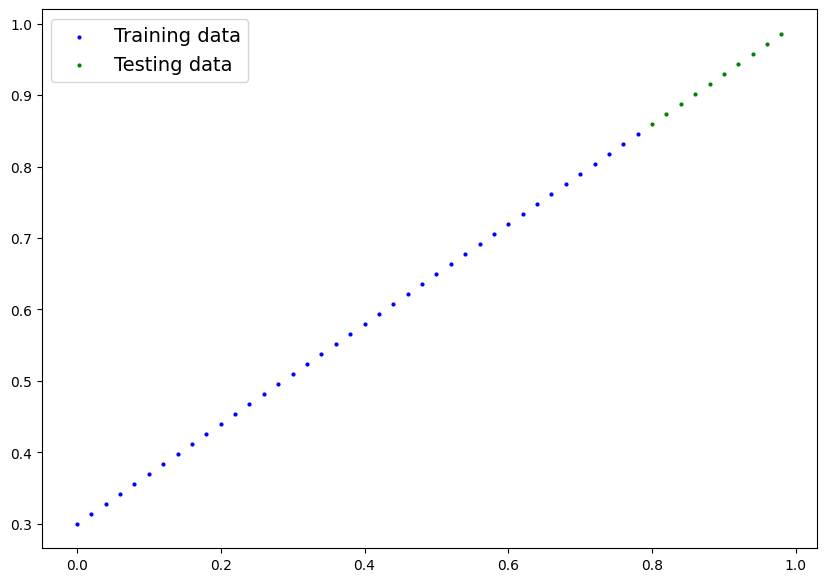

In [49]:
# Plot the data
# Note: if you don't have the plot_predictions() function loaded, this will error
plot_predictions(X_train, y_train, X_test, y_test)

## 6.2 Building a PyTorch Linear model